# Rice Field Nitrogen Stress Status Over a Small Region

WE repeat the analysis on the whole Natore district over a small region. The purpose is to be able to display on the map using folium without any loading huge files. The region is a representative of Natore to some extent. Thus the viewer can interact with the map and get an appreciation of the methods we used in this project. 

In [1]:
import numpy as np
import pandas as pd
import folium
from folium import plugins
from osgeo import gdal
import os
import streamlit as st
import matplotlib.pyplot as plt
import pickle

In [2]:
root_path = os.getcwd()
tif_path = os.path.join(root_path, 'roi_anomaly_files')
print(os.listdir(tif_path))

['2018_aman_Clre_Ntr_roi.tif', '2018_boro_Clre_Ntr_roi.tif', '2019_aman_Clre_Ntr_roi.tif', '2019_boro_Clre_Ntr_roi.tif', '2020_aman_Clre_Ntr_roi.tif', '2020_boro_Clre_Ntr_roi.tif', '2021_aman_Clre_Ntr_roi.tif', '2021_boro_Clre_Ntr_roi.tif', '2022_boro_Clre_Ntr_roi.tif']


In [3]:
boro_2018_path = os.path.join(tif_path,'2018_boro_Clre_Ntr_roi.tif') 
boro_2019_path = os.path.join(tif_path,'2019_boro_Clre_Ntr_roi.tif')
boro_2020_path = os.path.join(tif_path,'2020_boro_Clre_Ntr_roi.tif')
boro_2021_path = os.path.join(tif_path,'2021_boro_Clre_Ntr_roi.tif')
boro_2022_path = os.path.join(tif_path,'2022_boro_Clre_Ntr_roi.tif')

aman_2018_path = os.path.join(tif_path,'2018_aman_Clre_Ntr_roi.tif')
aman_2019_path = os.path.join(tif_path,'2019_aman_Clre_Ntr_roi.tif')
aman_2020_path = os.path.join(tif_path,'2020_aman_Clre_Ntr_roi.tif')
aman_2021_path = os.path.join(tif_path,'2021_aman_Clre_Ntr_roi.tif')


In [4]:
#Open raster file
driver=gdal.GetDriverByName('GTiff')
driver.Register()

def gdal_open(file): 
    ds = gdal.Open(file)
    if ds is None:
        print('Could not open : '+file)
        return
    return ds

ds_boro_2018 = gdal_open(boro_2018_path)
ds_boro_2019 = gdal_open(boro_2019_path)
ds_boro_2020 = gdal_open(boro_2020_path)
ds_boro_2021 = gdal_open(boro_2021_path)
ds_boro_2022 = gdal_open(boro_2022_path)

ds_aman_2018 = gdal_open(aman_2018_path)
ds_aman_2019 = gdal_open(aman_2019_path)
ds_aman_2020 = gdal_open(aman_2020_path)
ds_aman_2021 = gdal_open(aman_2021_path)

#Get coordinates, cols and rows
# all files are similar in cols, rows and geotransform data
ds = ds_boro_2018
geotransform = ds.GetGeoTransform()
cols = ds.RasterXSize 
rows = ds.RasterYSize 


#Get extent/ boundaries of image to be displayed on map (lat, lon)
xmin=geotransform[0]
ymax=geotransform[3]
xmax=xmin+cols*geotransform[1]
ymin=ymax+rows*geotransform[5]

#Get Central point
centerx=(xmin+xmax)/2
centery=(ymin+ymax)/2

print('Map center ', (centerx, centery))

#Raster convert to array in numpy
def tif_to_array(ds):
    bands = ds.RasterCount
    band=ds.GetRasterBand(1)
    dataset= band.ReadAsArray(0,0,cols,rows)
    data_nonan = np.nan_to_num(dataset, nan=-128)
    return data_nonan

boro_2018 = tif_to_array(ds_boro_2018)
boro_2019 = tif_to_array(ds_boro_2019)
boro_2020 = tif_to_array(ds_boro_2020)
boro_2021 = tif_to_array(ds_boro_2021)
boro_2022 = tif_to_array(ds_boro_2022)

aman_2018 = tif_to_array(ds_aman_2018)
aman_2019 = tif_to_array(ds_aman_2019)
aman_2020 = tif_to_array(ds_aman_2020)
aman_2021 = tif_to_array(ds_aman_2021)

Map center  (89.00552750820424, 24.365903766457897)


In [5]:
boro_2018.shape

(464, 851)

In [6]:
def classify_anomaly(x):
        if x == -128:
            return x
        if x <= -2:
            return 1
        elif x <= -1:
            return 2
        elif x <= 0:
            return 3
        elif x <= 1:
            return 4
        elif x <= 2:
            return 5

In [7]:
vf = np.vectorize(classify_anomaly)
boro_2018_classif = vf(boro_2018)
boro_2019_classif = vf(boro_2019)
boro_2020_classif = vf(boro_2020)
boro_2021_classif = vf(boro_2021)
boro_2022_classif = vf(boro_2022)

aman_2018_classif = vf(aman_2018)
aman_2019_classif = vf(aman_2019)
aman_2020_classif = vf(aman_2020)
aman_2021_classif = vf(aman_2021)

In [9]:
array_path = os.path.join(root_path,'geodata_roi')
os.mkdir(array_path)
boro_clre_list = [boro_2018_classif, boro_2019_classif, boro_2020_classif, boro_2021_classif, boro_2022_classif]
boro_path = os.path.join(array_path, 'boro_clre_arrays.pkl')
with open(boro_path, 'wb') as fm:
   pickle.dump(boro_clre_list, fm)


In [10]:
aman_clre_list = [aman_2018_classif, aman_2019_classif, aman_2020_classif, aman_2021_classif]
aman_path = os.path.join(array_path, 'aman_clre_arrays.pkl')
with open(aman_path, 'wb') as fm:
   pickle.dump(aman_clre_list, fm)


# Analysis of Areas of Rice Fields For Each Class

We will look at the areas of rice fields in each season as it changes from year to year for each of the four classes

In [11]:
df18 = pd.DataFrame(np.array([2018*np.ones_like(np.arange(2,6,1)), np.arange(2,6,1)]).T, columns=['year', 'class'])
df19 = pd.DataFrame(np.array([2019*np.ones_like(np.arange(2,6,1)), np.arange(2,6,1)]).T, columns=['year', 'class'])
df20 = pd.DataFrame(np.array([2020*np.ones_like(np.arange(2,6,1)), np.arange(2,6,1)]).T, columns=['year', 'class'])
df21 = pd.DataFrame(np.array([2021*np.ones_like(np.arange(2,6,1)), np.arange(2,6,1)]).T, columns=['year', 'class'])
df22 = pd.DataFrame(np.array([2022*np.ones_like(np.arange(2,6,1)), np.arange(2,6,1)]).T, columns=['year', 'class'])

df_area = pd.concat([df18, df19, df20, df21, df22])

df_area.shape #(20,2)
df_area['area_km_sq'] = np.zeros(df_area.shape[0])

In [12]:
def area(dat, n):
    return np.sum(dat == n*np.ones(dat.shape))/1e4

df_boro_area = df_area.copy()

for n in range(2,6):
    df_boro_area.loc[((df_boro_area['year'] == 2018) & (df_boro_area['class']==n)),'area_km_sq'] = area(boro_2018_classif,n)

for n in range(2,6):
    df_boro_area.loc[((df_boro_area['year'] == 2019) & (df_boro_area['class']==n)),'area_km_sq'] = area(boro_2019_classif,n)

for n in range(2,6):
    df_boro_area.loc[((df_boro_area['year'] == 2020) & (df_boro_area['class']==n)),'area_km_sq'] = area(boro_2020_classif,n)

for n in range(2,6):
    df_boro_area.loc[((df_boro_area['year'] == 2021) & (df_boro_area['class']==n)),'area_km_sq'] = area(boro_2021_classif,n)

for n in range(2,6):
    df_boro_area.loc[((df_boro_area['year'] == 2022) & (df_boro_area['class']==n)),'area_km_sq'] = area(boro_2022_classif,n)


In [13]:
def area(dat, n):
    return np.sum(dat == n*np.ones(dat.shape))/1e4

df_aman_area = df_area.iloc[:16,:].copy()

for n in range(2,6):
    df_aman_area.loc[((df_aman_area['year'] == 2018) & (df_aman_area['class']==n)),'area_km_sq'] = area(aman_2018_classif,n)

for n in range(2,6):
    df_aman_area.loc[((df_aman_area['year'] == 2019) & (df_aman_area['class']==n)),'area_km_sq'] = area(aman_2019_classif,n)

for n in range(2,6):
    df_aman_area.loc[((df_aman_area['year'] == 2020) & (df_aman_area['class']==n)),'area_km_sq'] = area(aman_2020_classif,n)

for n in range(2,6):
    df_aman_area.loc[((df_aman_area['year'] == 2021) & (df_aman_area['class']==n)),'area_km_sq'] = area(aman_2021_classif,n)

In [14]:
temp_boro = df_boro_area.groupby(['year']).sum().reset_index()
temp_boro.rename(columns={'area_km_sq':'Area_kmsq_sum_year'}, inplace=True)

temp_boro.drop(['class'], axis=1, inplace=True)
temp_boro

,year,Area_kmsq_sum_year
0,2018,10.978
1,2019,10.978
2,2020,10.978
3,2021,10.978
4,2022,10.978


In [15]:
temp_aman = df_aman_area.groupby(['year']).sum().reset_index()
temp_aman.rename(columns={'area_km_sq':'Area_kmsq_sum_year'}, inplace=True)

temp_aman.drop(['class'], axis=1, inplace=True)
temp_aman

,year,Area_kmsq_sum_year
0,2018,12.947
1,2019,12.947
2,2020,12.947
3,2021,12.947


In [17]:
df_boro_area_ext = pd.merge(df_boro_area, temp_boro,left_on=['year'], right_on=['year'], how='inner')
df_boro_area_ext['percent_area'] = 100*df_boro_area_ext['area_km_sq']/df_boro_area_ext['Area_kmsq_sum_year']

df_boro_area_ext

,year,class,area_km_sq,Area_kmsq_sum_year,percent_area
0,2018,2,1.5007,10.978,13.670067
1,2018,3,5.5547,10.978,50.598470
2,2018,4,2.8321,10.978,25.797960
3,2018,5,1.0905,10.978,9.933503
4,2019,2,0.5361,10.978,4.883403
5,2019,3,2.7470,10.978,25.022773
6,2019,4,4.2848,10.978,39.030789
7,2019,5,3.4101,10.978,31.063035
8,2020,2,2.4338,10.978,22.169794
9,2020,3,6.2704,10.978,57.117872


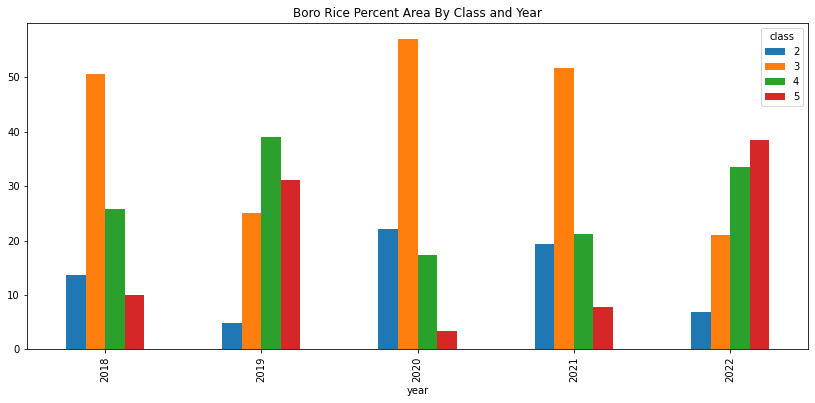

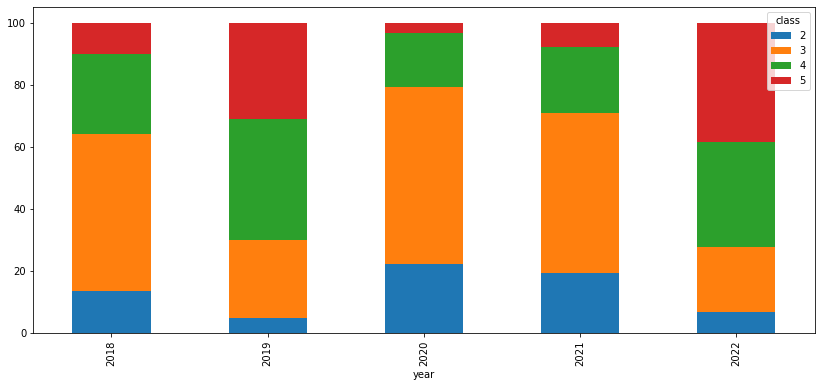

In [18]:
df2 = df_boro_area_ext[['year', 'class', 'percent_area']].copy()
df3 = df2.pivot(index = 'year', columns = 'class', values = 'percent_area')

df3.plot.bar(figsize = (14,6))
plt.title('Boro Rice Percent Area By Class and Year')

df3.plot.bar(stacked=True,figsize=(14,6))
plt.show()

In [19]:
df_aman_area_ext = pd.merge(df_aman_area, temp_aman,left_on=['year'], right_on=['year'], how='inner')
df_aman_area_ext['percent_area'] = 100*df_aman_area_ext['area_km_sq']/df_aman_area_ext['Area_kmsq_sum_year']

df_aman_area_ext

,year,class,area_km_sq,Area_kmsq_sum_year,percent_area
0,2018,2,1.8945,12.947,14.632733
1,2018,3,5.3327,12.947,41.188692
2,2018,4,4.4697,12.947,34.523056
3,2018,5,1.2501,12.947,9.655519
4,2019,2,2.8868,12.947,22.297057
5,2019,3,5.0487,12.947,38.995134
6,2019,4,3.8171,12.947,29.482506
7,2019,5,1.1944,12.947,9.225303
8,2020,2,2.6633,12.947,20.570789
9,2020,3,3.0598,12.947,23.633274


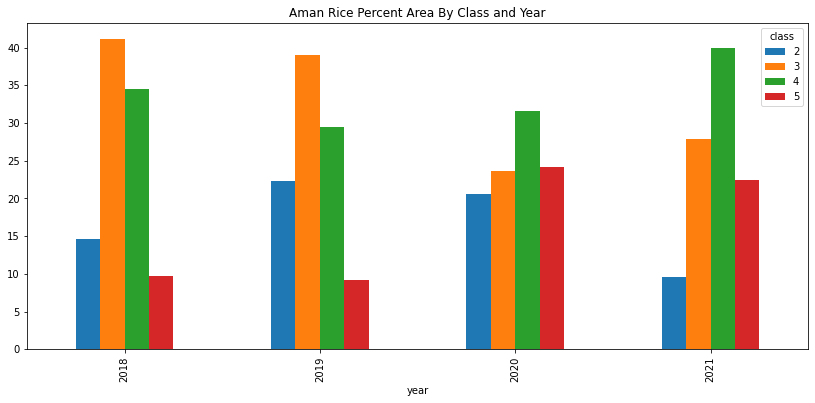

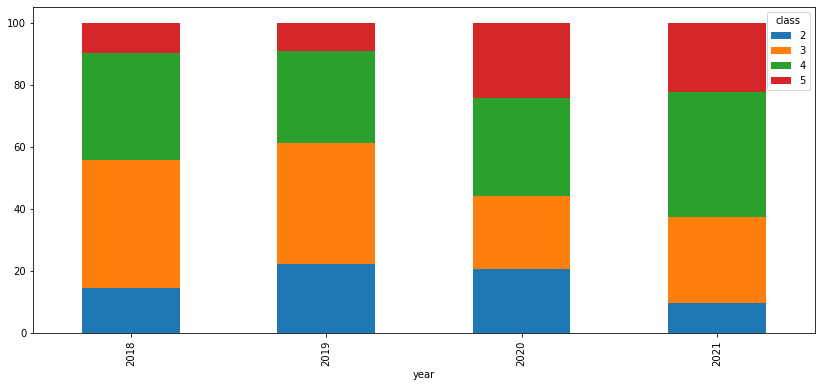

In [20]:
df4 = df_aman_area_ext[['year', 'class', 'percent_area']].copy()
df5 = df4.pivot(index = 'year', columns = 'class', values = 'percent_area')

df5.plot.bar(figsize = (14,6))
plt.title('Aman Rice Percent Area By Class and Year')

df5.plot.bar(stacked=True,figsize=(14,6))
plt.show()

In [21]:
## colors : R,G,B,alpha
raster_to_coloridx = {
 2: (0.8941176470588236, 0.10196078431372549, 0.10980392156862745,0.7), #red
 3: (1.0, 1.0, 0.2, 0.7), #yellow
 4: (0.1, 0.6, 0.1, 0.7), #green 
 5: (0.596078431372549, 0.3058823529411765, 0.6392156862745098, 0.7), #purple
 -128: (1, 1, 1, 0)}

m = folium.Map(location=[centery, centerx], zoom_start=14, tiles = 'openstreetmap')

folium.raster_layers.ImageOverlay(
    name="boro 2018",
    image=boro_2018_classif.astype(int),
    bounds=[[ymin, xmin], [ymax, xmax]],
    opacity=0.7,
    colormap=lambda x: raster_to_coloridx[x],
    interactive=True,
    cross_origin=False,
    zindex=1,
    ).add_to(m)
    
folium.raster_layers.ImageOverlay(
    name="boro 2019",
    image=boro_2019_classif,
    bounds=[[ymin, xmin], [ymax, xmax]],
    opacity=0.7,
    colormap=lambda x: raster_to_coloridx[x],
    interactive=True,
    cross_origin=False,
    zindex=1,
    ).add_to(m)

folium.raster_layers.ImageOverlay(
    name="boro 2020",
    image=boro_2020_classif,
    bounds=[[ymin, xmin], [ymax, xmax]],
    opacity=0.7,
    colormap=lambda x: raster_to_coloridx[x],
    interactive=True,
    cross_origin=False,
    zindex=1,
    ).add_to(m)
    
folium.raster_layers.ImageOverlay(
    name="boro 2021",
    image=boro_2021_classif,
    bounds=[[ymin, xmin], [ymax, xmax]],
    opacity=0.7,
    colormap=lambda x: raster_to_coloridx[x],
    interactive=True,
    cross_origin=False,
    zindex=1,
    ).add_to(m)

folium.raster_layers.ImageOverlay(
    name="boro 2022",
    image=boro_2022_classif,
    bounds=[[ymin, xmin], [ymax, xmax]],
    opacity=0.7,
    colormap=lambda x: raster_to_coloridx[x],
    interactive=True,
    cross_origin=False,
    zindex=1,
    ).add_to(m)

folium.LayerControl().add_to(m)

m
